# Model Training

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import datetime
from numpy import inf
import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import model_selection

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
training_dataset = pd.read_csv('../2_database/data_processing/02_03_training_dataset.csv',
                               sep=';')

validation_dataset = pd.read_csv('../2_database/data_processing/02_03_validation_dataset.csv',
                                 sep=';')

In [3]:
print("Training and Validation size: " + str(training_dataset.shape) + " / " + str(validation_dataset.shape))

Training and Validation size: (422, 52) / (141, 52)


In [4]:
training_dataset.head()

,pct_pol_neg,pct_pol_pos,pct_pol_neu,education_var_01_qt_pct,family_var_01_adequada_pct,family_var_01_semi_adequada_pct,family_var_01_inadequada_pct,fertility_var_01_has_children_pct,fertility_var_01_children_born_pct,fertility_var_01_children_borned_live_pct,...,state_pr,state_rj,state_rn,state_ro,state_rr,state_rs,state_sc,state_se,state_sp,state_to
0,0.017929,0.026417,0.958357,1.021423,0.054541,1.033242,9.985730,0.989622,1.090811,1.082467,...,0,0,0,0,0,1,0,0,0,0
1,0.013723,0.025105,0.964276,1.058820,1.178352,0.638225,24.733100,1.010927,1.133640,1.122890,...,0,0,0,0,0,0,1,0,0,0
2,0.012676,0.025575,0.963083,0.991957,0.641255,1.170128,9.192867,0.999439,1.147375,1.140280,...,0,0,0,0,0,1,0,0,0,0
3,0.021631,0.030575,0.949254,0.970031,0.876919,1.228749,2.848914,0.962917,1.129891,1.123553,...,0,0,0,0,0,0,0,0,0,0
4,0.014607,0.031221,0.955085,0.974727,2.738600,0.943244,2.845043,0.977073,1.233269,1.185966,...,1,0,0,0,0,0,0,0,0,0


### Testing different algorithms

In [5]:
####### parameters for models' tests ######
scoring='neg_mean_squared_error'
n_splits=2
###########################################

models = []

models.append(('Linear Regression', LinearRegression()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Support Vector Machine', SVR()))
models.append(('Gradient Boosting', GradientBoostingRegressor()))

In [6]:
array = training_dataset.iloc[:, np.r_[0, 3:52]].values

X_training = array[:, 1:]
Y_training = array[:, 0]

Linear Regression 2019-07-11 19:36:01.881528
Random Forest 2019-07-11 19:36:01.890186
Support Vector Machine 2019-07-11 19:36:01.971833
Gradient Boosting 2019-07-11 19:36:01.975025
The End - 2019-07-11 19:36:02.133389


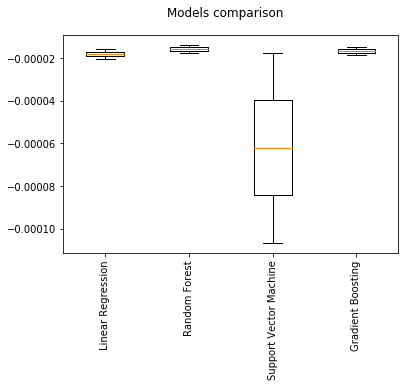

In [8]:
# prepare configuration for cross validation
seed = 7

# evaluate each model in turn
results = []
names = []

for model_name, model in models:
    print(model_name + ' ' + str(datetime.datetime.now()))
    kfold = model_selection.KFold(n_splits=n_splits,
                                  random_state=seed)
    cv_results = model_selection.cross_val_score(model,
                                                 X_training,
                                                 Y_training,
                                                 cv=kfold,
                                                 scoring=scoring)
    results.append(cv_results)
    names.append(model_name)

print('The End - ' + str(datetime.datetime.now()))

# boxplot models comparison
fig = plt.figure()
fig.suptitle('Models comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

### Function for regression evaluation

In [8]:
def regression_evaluation(Y_training, y_training_pred, Y_validation, y_validation_pred):
    coin_simulation = np.random.randint(7, 20, size=len(Y_validation)) * 0.001
    
    print("Observed validation (min, med, max): " + str(np.round(np.min(Y_validation), 5)) + " , " + str(np.round(np.median(Y_validation), 5)) + " , " + str(np.round(np.max(Y_validation), 5)) + "\n" + 
          "Predicted validation (min, med, max): " + str(np.round(np.min(y_validation_pred), 5)) + " , " + str(np.round(np.median(y_validation_pred), 5)) + " , " + str(np.round(np.max(y_validation_pred), 5)))
    
    print("\n")
    
    print("R2 training: " + str(np.round(r2_score(Y_training, y_training_pred), 5)) + "\n" + 
          "R2 validation: " + str(np.round(r2_score(Y_validation, y_validation_pred), 5)) + "\n" +
          "R2 validation vs coin: " + str(np.round(r2_score(Y_validation, coin_simulation), 5)))
    
    print("\n")
    
    print("RMSE training: " + str(np.round(np.sqrt(mean_squared_error(Y_training, y_training_pred)), 5)) + "\n" +
          "RMSE validation: " + str(np.round(np.sqrt(mean_squared_error(Y_validation, y_validation_pred)), 5)) + "\n" + 
          "RMSE validation vs coin: " + str(np.round(np.sqrt(mean_squared_error(Y_validation, coin_simulation)), 5)))
    
    plt.scatter(Y_training, y_training_pred)
    plt.scatter(Y_validation, y_validation_pred)

### 1) Testing GradientBoostingRegressor

In [10]:
array = training_dataset.iloc[:, np.r_[0, 3:52]].values

X_training = array[:, 1:]
Y_training = array[:, 0]

In [11]:
array = validation_dataset.iloc[:, np.r_[0, 3:52]].values

X_validation = array[:, 1:]
Y_validation = array[:, 0]

In [12]:
model = GradientBoostingRegressor(n_estimators=1000,
                                  learning_rate=0.01,
                                  min_samples_leaf=0.01,
                                  max_depth=2,
                                  random_state=7)
model.fit(X_training, Y_training)

y_training_pred = model.predict(X_training)
y_validation_pred = model.predict(X_validation)

Observed validation (min, med, max): 0.00359 , 0.01684 , 0.02995
Predicted validation (min, med, max): 0.01275 , 0.01712 , 0.02206


R2 training: 0.50258
R2 validation: -0.01781
R2 validation vs coin: -2.22334


RMSE training: 0.00265
RMSE validation: 0.00382
RMSE validation vs coin: 0.0068


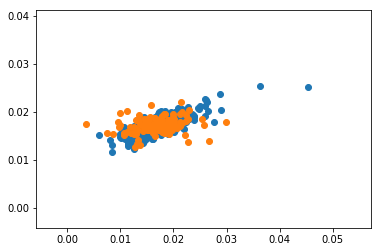

In [13]:
regression_evaluation(Y_training, y_training_pred, Y_validation, y_validation_pred)

In [12]:
#pd.DataFrame(model.feature_importances_, training_dataset.iloc[:, 3:52].columns).sort_values(0, ascending=False)

### 2) Testing LinearRegressor

In [14]:
array = training_dataset.iloc[:, np.r_[0, 3:52]].values

X_training = training_dataset[['social_indicator_var_03_responsable_illiterate_pct',
                               'fertility_var_02_separated_pct']]
Y_training = array[:, 0]

In [15]:
array = validation_dataset.iloc[:, np.r_[0, 3:52]].values

X_validation = validation_dataset[['social_indicator_var_03_responsable_illiterate_pct',
                                   'fertility_var_02_separated_pct']]
Y_validation = array[:, 0]

In [16]:
model = LinearRegression()
model.fit(X_training, Y_training)

y_training_pred = model.predict(X_training)
y_validation_pred = model.predict(X_validation)

Observed validation (min, med, max): 0.00359 , 0.01684 , 0.02995
Predicted validation (min, med, max): 0.01339 , 0.01718 , 0.01771


R2 training: 0.00708
R2 validation: -0.03278
R2 validation vs coin: -1.86815


RMSE training: 0.00375
RMSE validation: 0.00385
RMSE validation vs coin: 0.00641


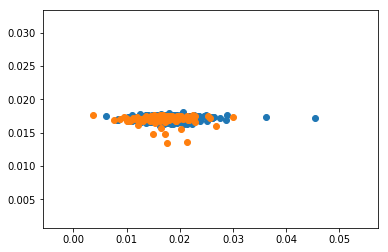

In [17]:
regression_evaluation(Y_training, y_training_pred, Y_validation, y_validation_pred)